The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex', 'organization_name', 'organization_city', 'organization_country', 'death_date', 'death_city', 'death_country']


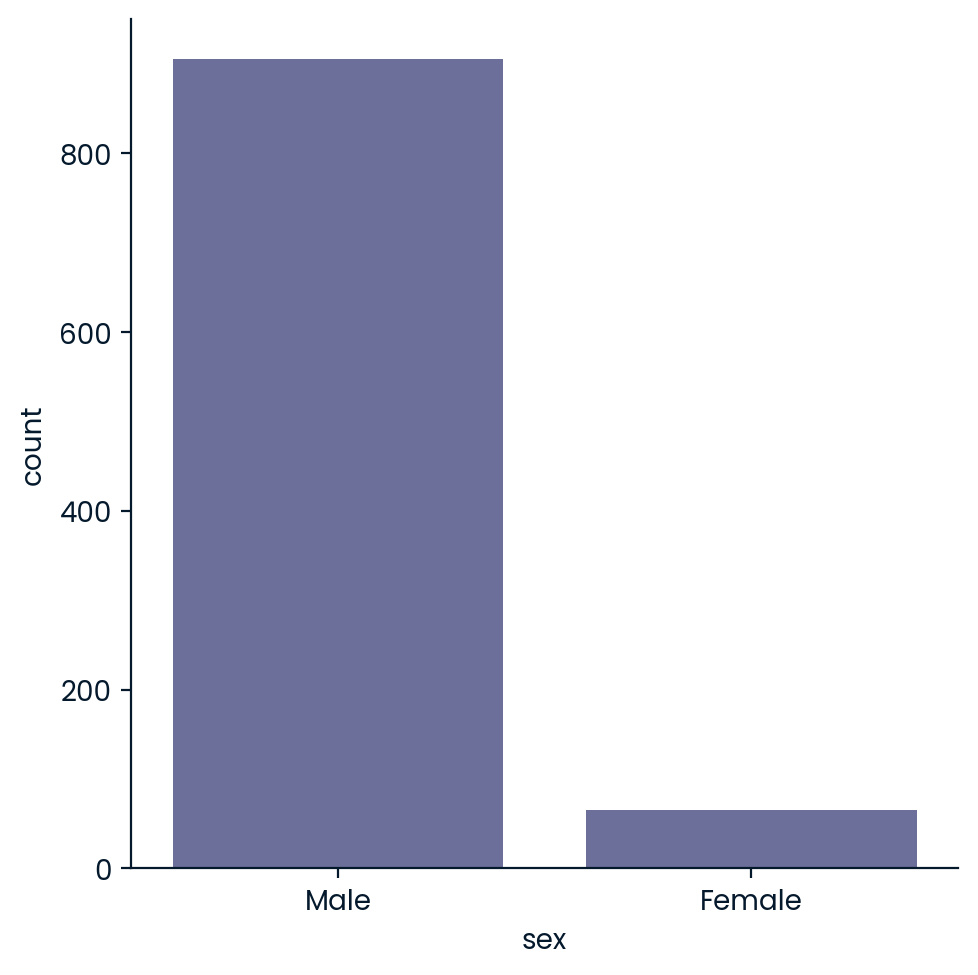

In [182]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
nobel = pd.read_csv('data/nobel.csv')
# Start coding here!
print(list(nobel))
sns.catplot(x='sex', data=nobel, kind="count")
plt.show()

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
French protectorate of Tunisia (now Tunisia)      1
Free City of Danzig (Poland)                      1
Faroe Islands (Denmark)                           1
Ethiopia                                          1
Yemen                                             1
Name: birth_country, Length: 129, dtype: int64


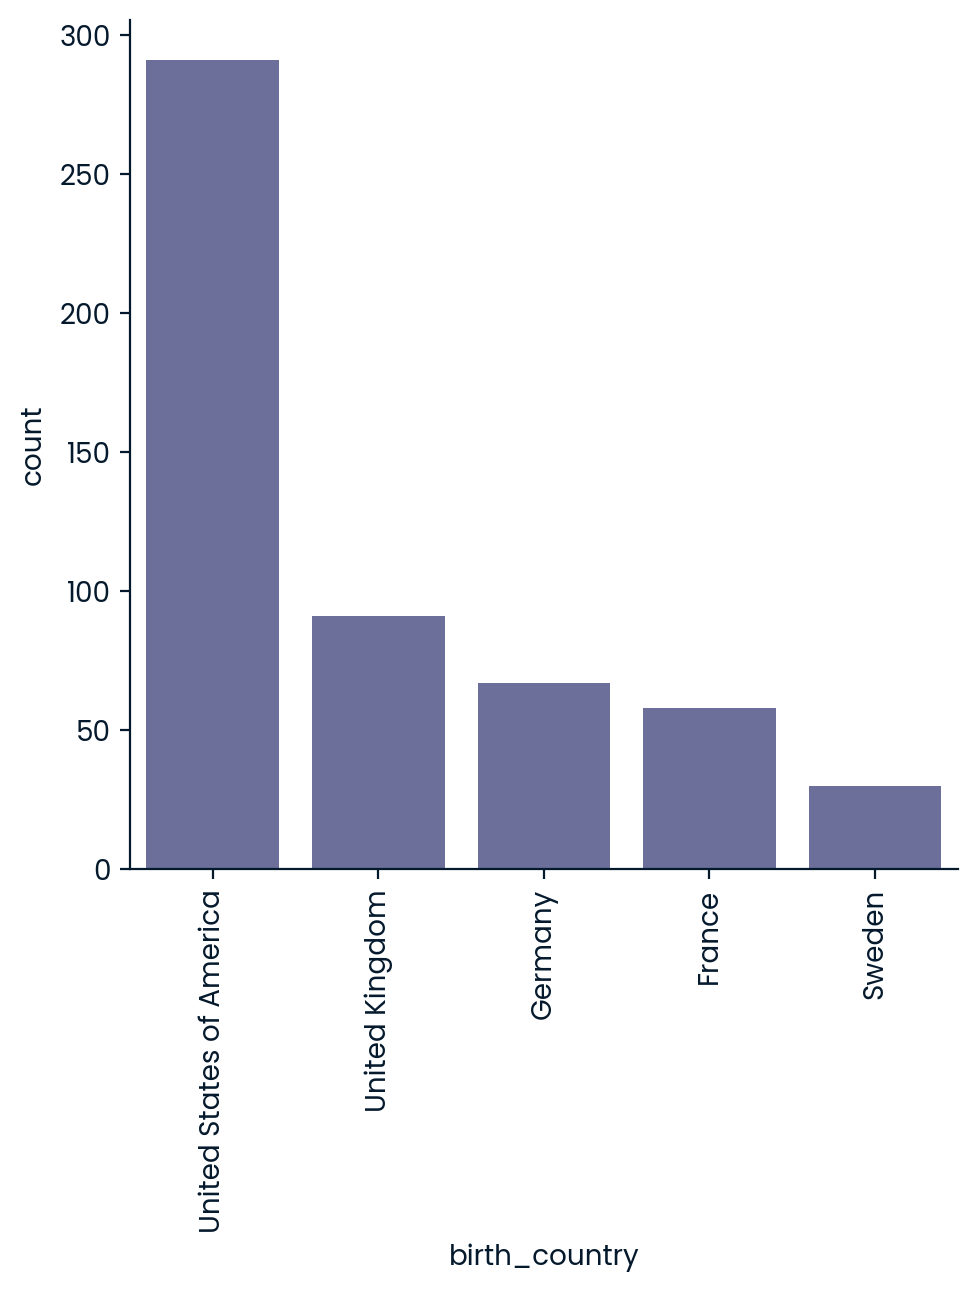

In [183]:
nobel_birth_country = nobel.groupby('birth_country')['birth_country'].count().sort_values(ascending=False)   
print(nobel_birth_country)

sns.catplot(x='birth_country', data=nobel, kind="count", order=["United States of America", "United Kingdom", "Germany", "France", "Sweden"])
plt.xticks(rotation=90)
plt.show()

In [184]:
nobel['decade'] = (nobel['year'].astype(int)//10)*10
nobel_country = nobel.groupby('decade').count()
nobel_country['US_Count'] =  nobel[nobel['birth_country'] == 'United States of America'].groupby('decade').count()['birth_country']
nobel_country['US_ratio'] = nobel_country['US_Count']/nobel_country['birth_country']

print(nobel_country[['birth_country', 'US_Count', 'US_ratio']].sort_values('US_ratio', ascending=False))


        birth_country  US_Count  US_ratio
decade                                   
2000              119        52  0.436975
1990              101        42  0.415842
2020               46        18  0.391304
1980               94        31  0.329787
1940               40        13  0.325000
2010              117        38  0.324786
1970              103        33  0.320388
1950               71        21  0.295775
1960               75        21  0.280000
1930               55        14  0.254545
1910               38         3  0.078947
1920               54         4  0.074074
1900               56         1  0.017857


In [185]:
nobel_decade_category = nobel.groupby(['decade', 'category']).count()
nobel_decade_category['Female_Count'] = (nobel[nobel["sex"] == "Female"].groupby(['decade', 'category']).count()['sex']).astype(int)
nobel_decade_category['Female_Ratio'] = (nobel_decade_category['Female_Count'] / nobel_decade_category['sex']).round(4)
print(nobel_decade_category[['sex', 'Female_Count', 'Female_Ratio']].sort_values("Female_Ratio", ascending=False))


                   sex  Female_Count  Female_Ratio
decade category                                   
2020   Peace         4           2.0           0.5
       Literature    4           2.0           0.5
2010   Peace        10           5.0           0.5
       Literature   10           3.0           0.3
1990   Literature   10           3.0           0.3
...                ...           ...           ...
1980   Physics      22           NaN           NaN
1990   Chemistry    18           NaN           NaN
       Economics    17           NaN           NaN
       Physics      22           NaN           NaN
2000   Physics      28           NaN           NaN

[72 rows x 3 columns]


In [186]:
woman_laureate = nobel[nobel["sex"] == "Female"].sort_values("year")
print(woman_laureate[["year", "full_name", "category"]])

     year                                          full_name    category
19   1903                        Marie Curie, née Sklodowska     Physics
29   1905  Baroness Bertha Sophie Felicita von Suttner, n...       Peace
51   1909                      Selma Ottilia Lovisa Lagerlöf  Literature
62   1911                        Marie Curie, née Sklodowska   Chemistry
128  1926                                     Grazia Deledda  Literature
..    ...                                                ...         ...
982  2022                                       Annie Ernaux  Literature
993  2023                                    Anne L’Huillier     Physics
998  2023                                   Narges Mohammadi       Peace
989  2023                                     Katalin Karikó    Medicine
999  2023                                     Claudia Goldin   Economics

[65 rows x 3 columns]


In [187]:
repeat_laureat = nobel.groupby("full_name").size().sort_values(ascending=False) > 1
print(repeat_laureat[repeat_laureat].index)

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)',
       'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen',
       'Marie Curie, née Sklodowska'],
      dtype='object', name='full_name')


In [188]:
top_gender = "Male"
top_country = "United States of America"
max_decade_usa = 2000
max_female_dict = {2020:"Literature"}
first_woman_name = "Marie Curie, née Sklodowska"
first_woman_category = "Physics"
repeat_list =list(repeat_laureat[repeat_laureat].index)